<a href="https://colab.research.google.com/github/sailu708d/clustering1.ipynb/blob/main/clustering1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [4]:
airline_data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
airline_data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
airline_data.astype(dtype='object')


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
airline_data.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
print('unique_cc1',airline_data.cc1_miles.unique())
print('unique_cc2',airline_data.cc2_miles.unique())
print('unique_cc3',airline_data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [9]:
airline_data.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

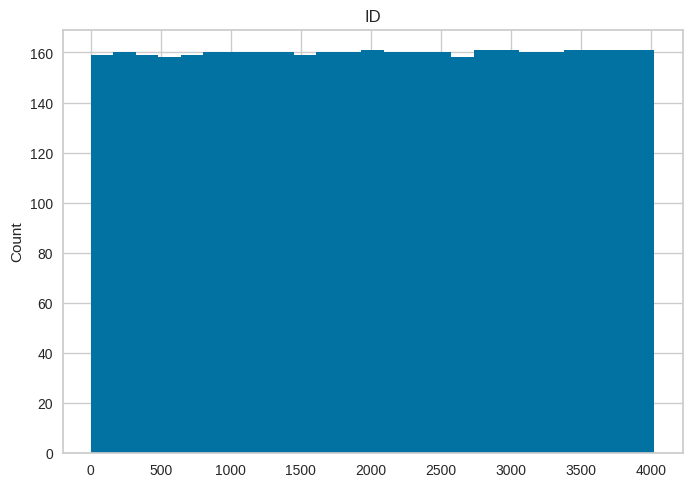

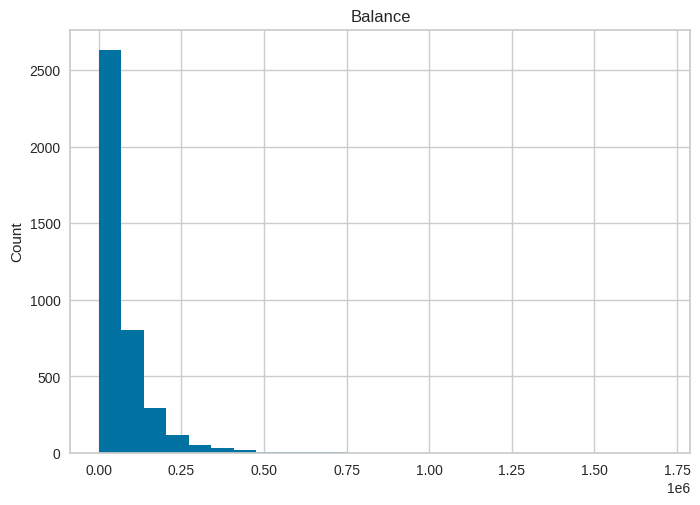

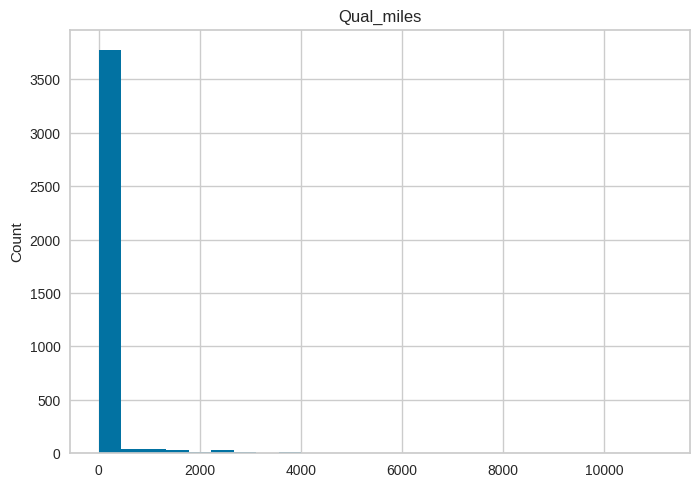

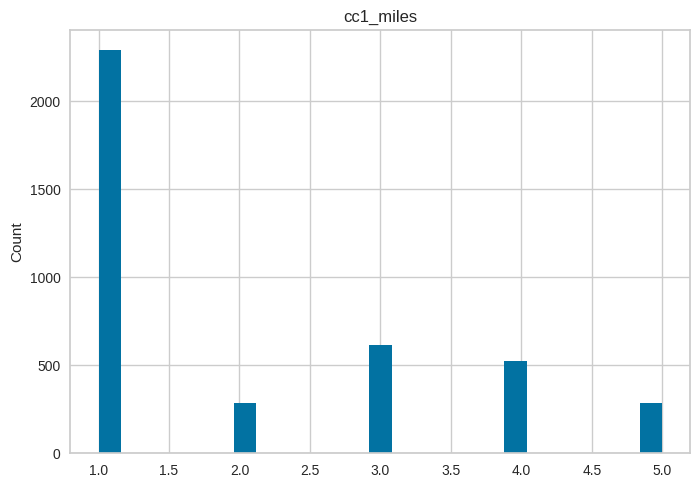

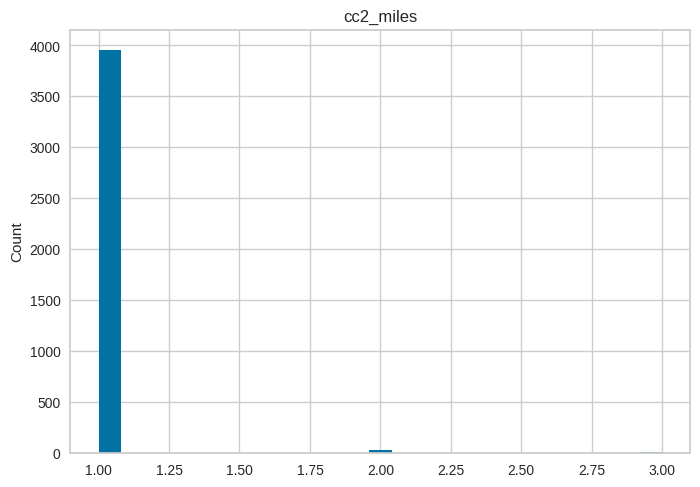

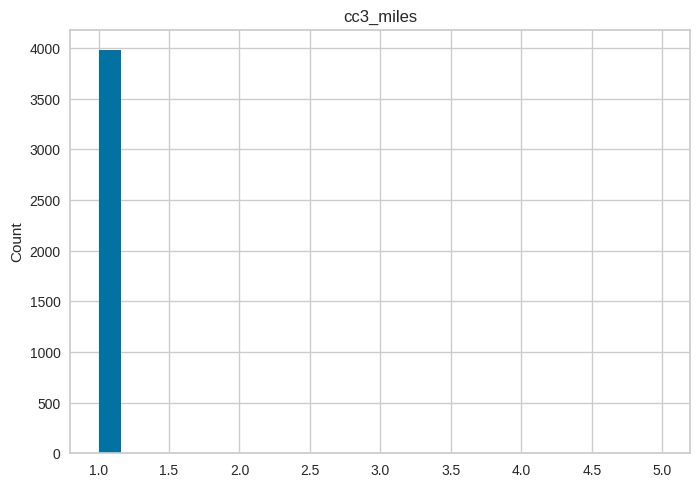

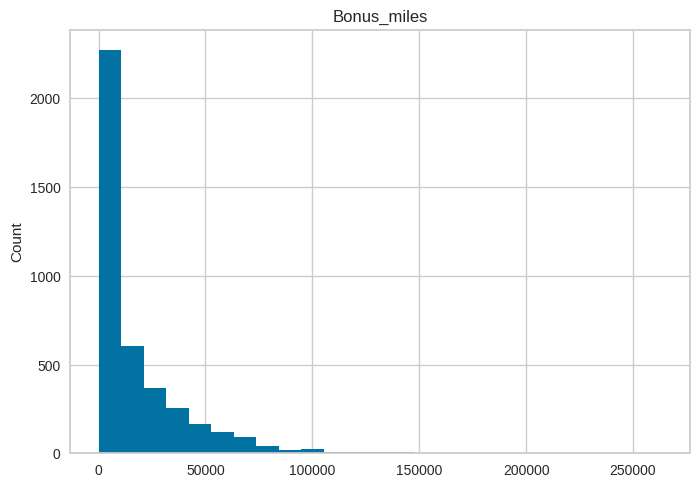

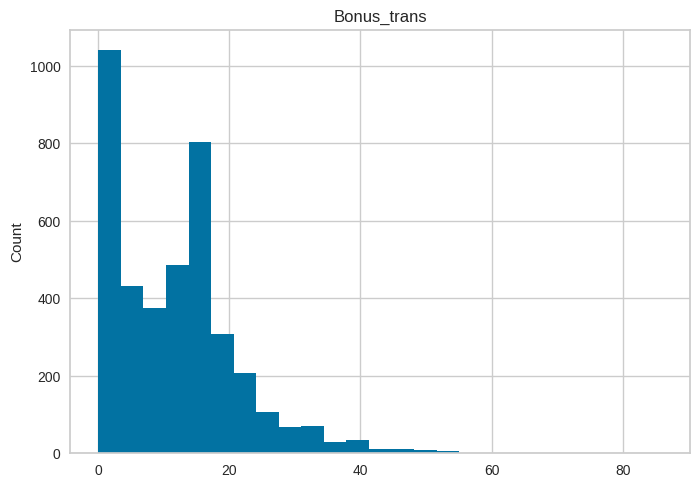

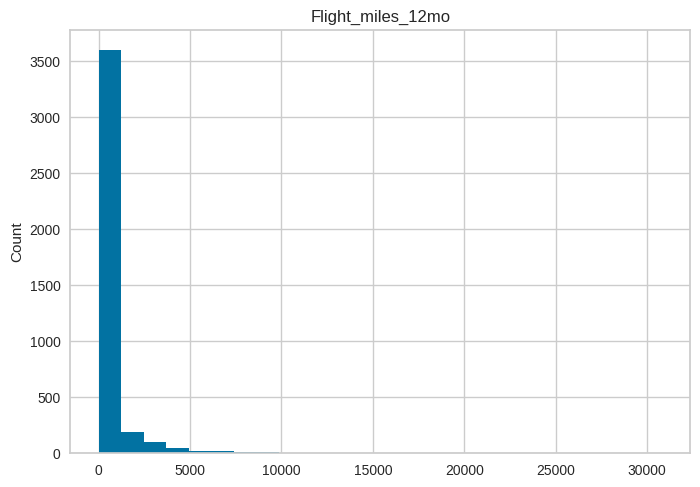

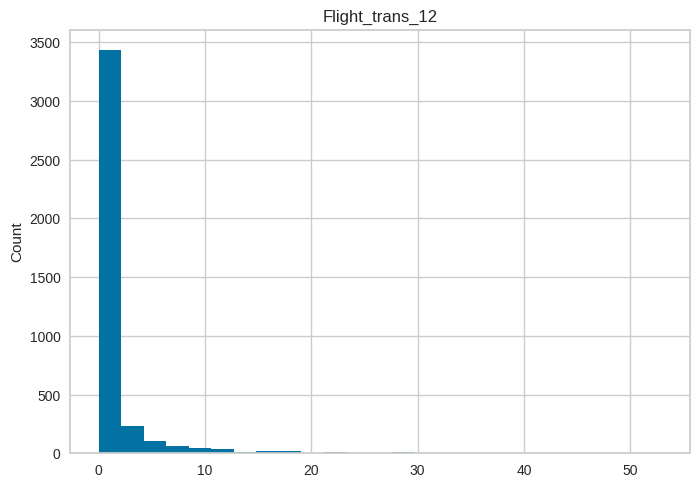

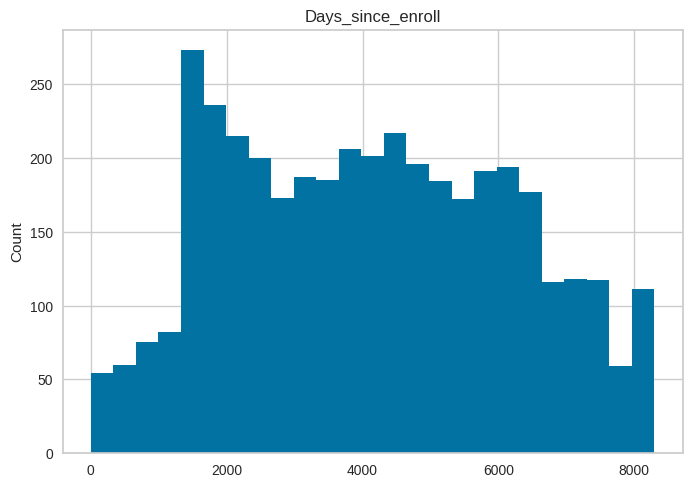

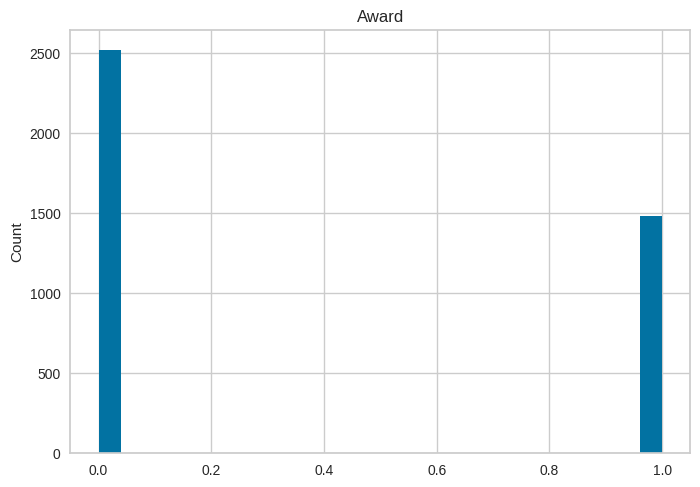

In [10]:
for feature in airline_data.columns:
    airline_data1 = airline_data.copy()
    airline_data1[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [11]:
airline_data.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

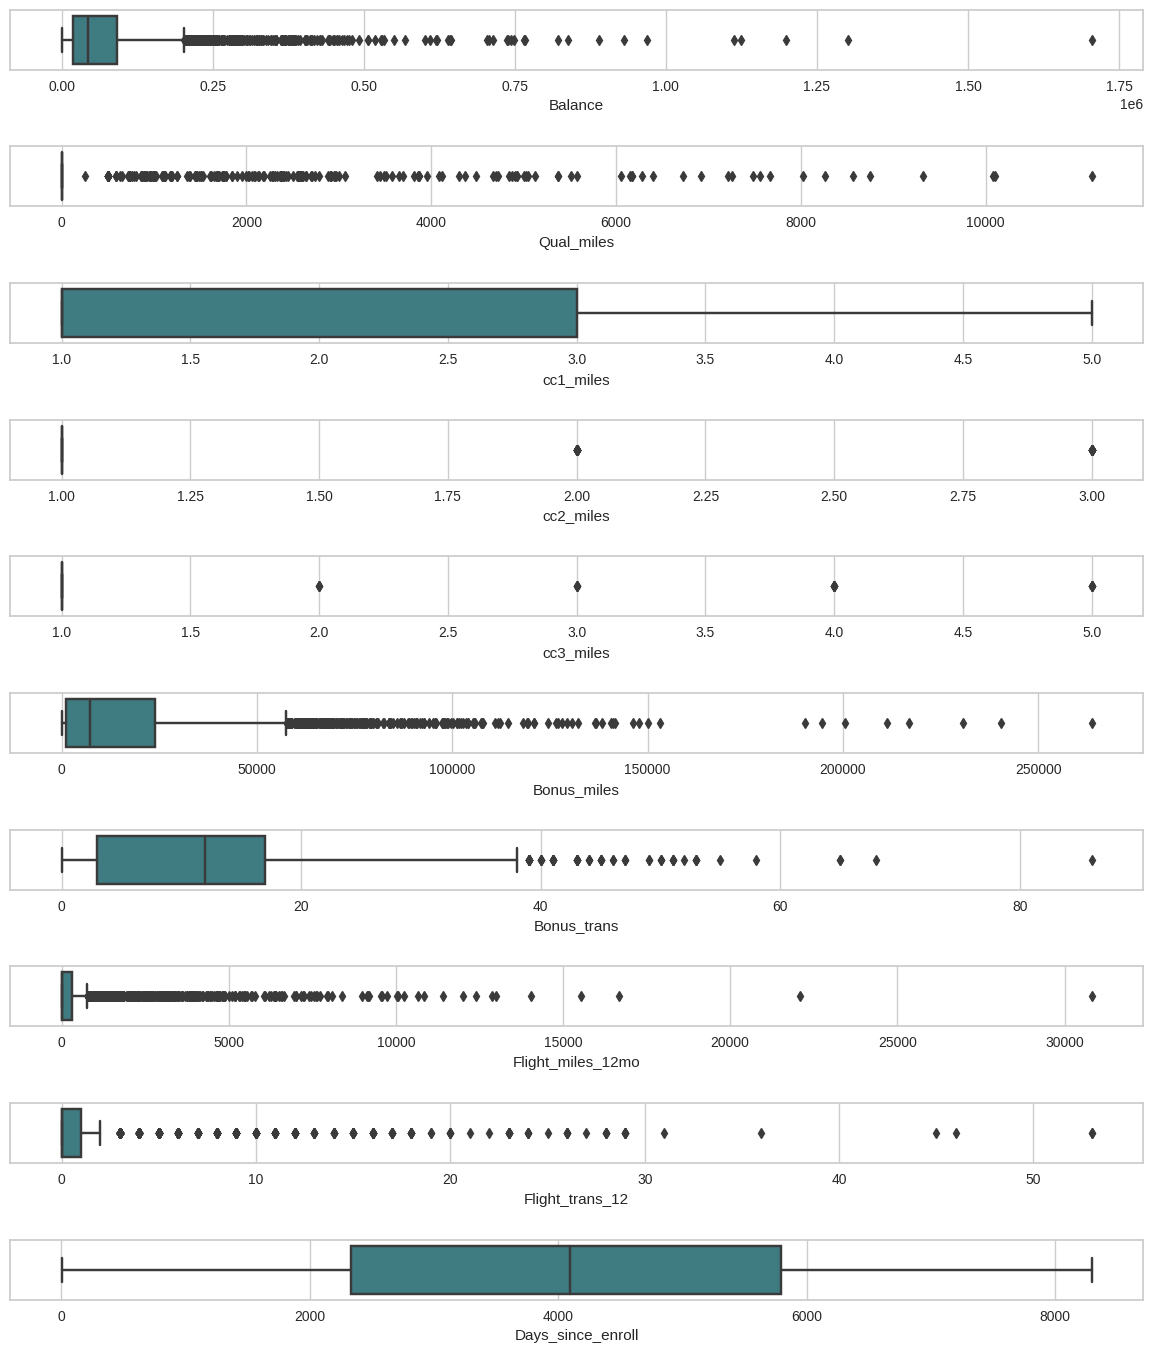

In [12]:
outlier = airline_data.copy()
fig, axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

In [13]:
countNotermdeposit = len(airline_data[airline_data.Award == 0])
countHavetermdeposit = len(airline_data[airline_data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(airline_data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((countHavetermdeposit / (len(airline_data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


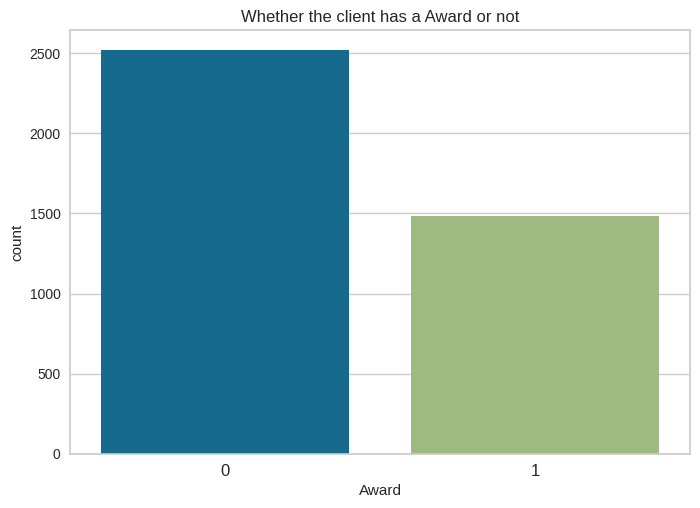

In [14]:
sns.countplot(x='Award', data= airline_data, order= airline_data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not')
plt.show()

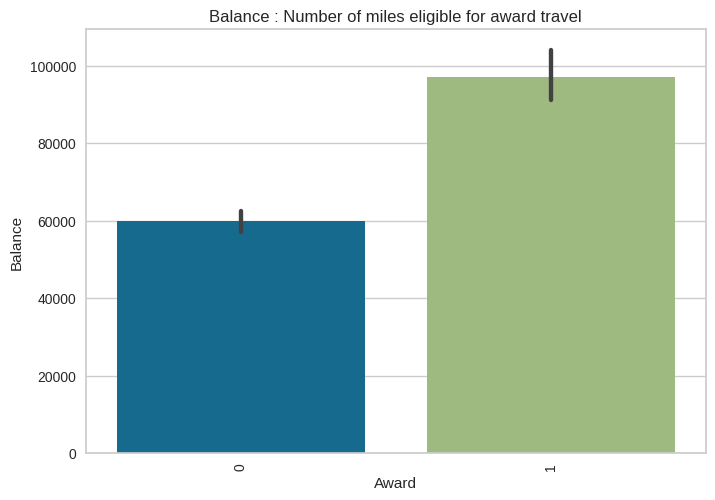

In [15]:
Balance = airline_data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.title('Balance : Number of miles eligible for award travel')
plt.xticks(rotation=90)
plt.show()

In [16]:
corr_matrix = airline_data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID                  -0.243737
Name: Balance, dtype: float64

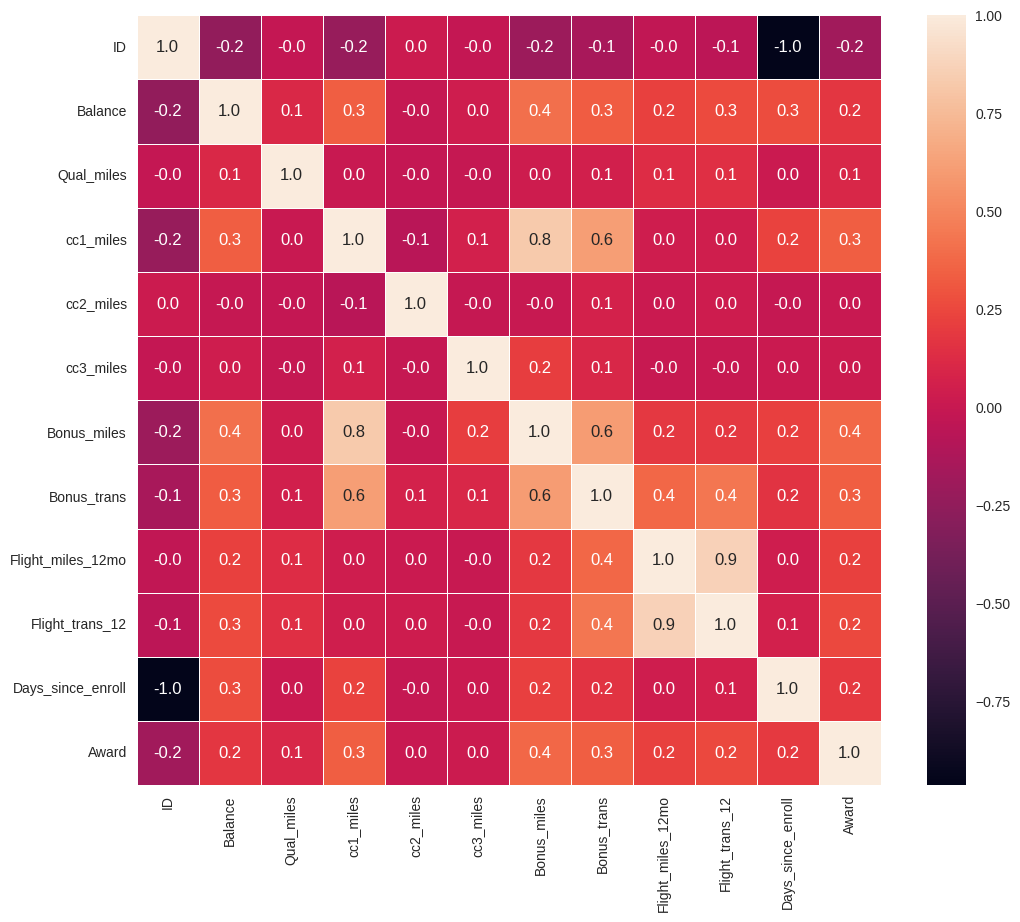

In [17]:
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(airline_data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

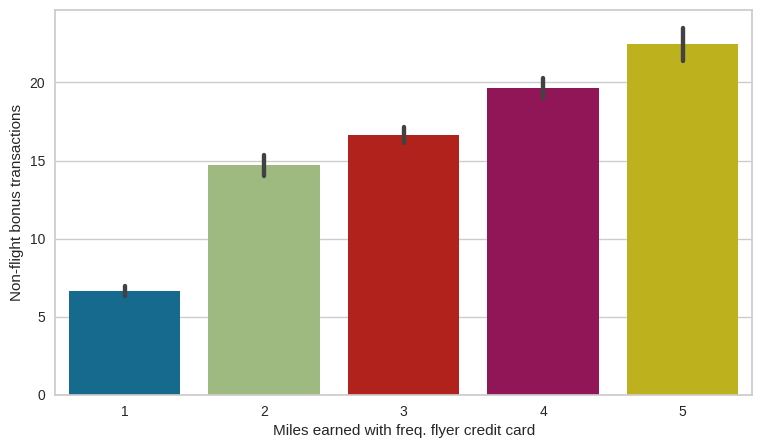

In [18]:
plt.figure(figsize = (9,5))
sorted_data = airline_data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.show()

In [19]:
standard_scaler = StandardScaler()
std_airline = standard_scaler.fit_transform(airline_data)
std_airline.shape

(3999, 12)

In [20]:
minmax = MinMaxScaler()
norm_airline = minmax.fit_transform(airline_data)
norm_airline.shape

(3999, 12)

In [21]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_airline)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,47988.000000
1,2,39018.751098
2,3,34529.212676
3,4,30616.623636
4,5,26894.837420
5,6,23493.526100
6,7,21884.524155
7,8,19329.743449
8,9,18018.581677
9,10,16768.989730


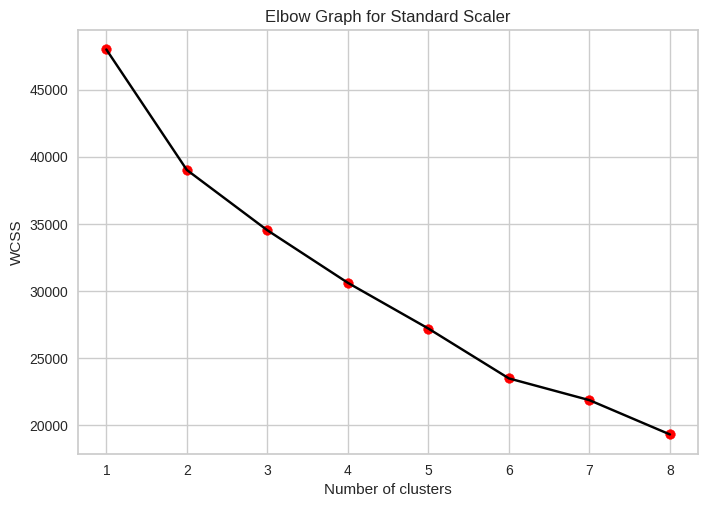

In [22]:
wcss=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_airline)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_airline)
    clusters_inertia.append(KM_est.inertia_)  # data for the elbow method
    silhouette_avg = silhouette_score(std_airline, KM_est.labels_)
    s_scores.append(silhouette_avg)

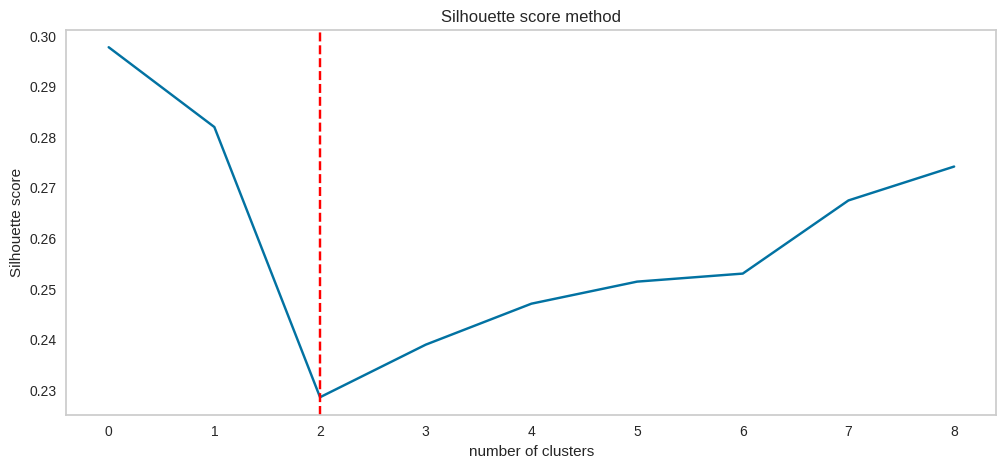

In [24]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot( s_scores,  ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for Standard Scaler data


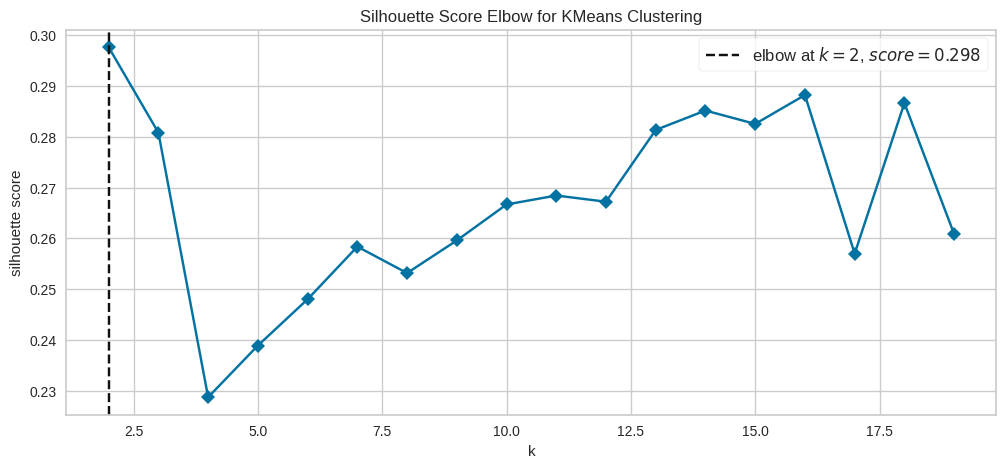

In [25]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
fig, ax = plt.subplots(figsize=(12,5))
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_airline)
visualizer.poof()
plt.show()

In [26]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_airline)
    sil_score1= silhouette_score(std_airline, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.2979332294964896
For n_clusters = 3 The average silhouette_score is : 0.28132087151477925
For n_clusters = 4 The average silhouette_score is : 0.2287218085633998
For n_clusters = 5 The average silhouette_score is : 0.23890516538353704
For n_clusters = 6 The average silhouette_score is : 0.24755064720991263
For n_clusters = 7 The average silhouette_score is : 0.24211334683095515
For n_clusters = 8 The average silhouette_score is : 0.2530376128959621
For n_clusters = 9 The average silhouette_score is : 0.2596383258629409


Conclusion:
According the the silhouette score of:

 The standardized data, the ideal number of clusters is 6, with a score higher than other options, of 0.33


6.3 Build KMeans Cluster algorithm

---

using K=6 and Standard Scaler Applied Dataset
      We have found good number of cluster = 6
      Model building using cluster number = 6

In [27]:
model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_airline)
y_predict_kmeans.shape

(3999,)

In [28]:
# these are nothing but cluster labels...
y_predict_kmeans

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [29]:
model_kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [30]:
model_kmeans.cluster_centers_

array([[-0.23852715,  1.18446344,  0.88037642,  0.11446574, -0.09824189,
        -0.06276658,  0.63780138,  1.65423176,  3.64043543,  3.92064625,
         0.275472  ,  0.9224481 ],
       [ 0.96803202, -0.33839012, -0.05974896, -0.50115538, -0.09824189,
        -0.06276658, -0.46151109, -0.41763139, -0.18820091, -0.207612  ,
        -0.95928629, -0.35719626],
       [-0.792215  , -0.16310888, -0.05017319, -0.50959763, -0.09824189,
        -0.05874576, -0.47211132, -0.39177122, -0.16556507, -0.17590564,
         0.7709545 , -0.25164813],
       [-0.39326741,  0.51242422,  0.02653687,  1.35981814, -0.09824189,
        -0.05276166,  1.12237626,  0.79890128, -0.06452417, -0.07095245,
         0.39623627,  0.68913829],
       [-0.30152248,  0.63971926, -0.08443292,  1.0220844 , -0.09824189,
        15.64629931,  3.17969131,  1.71461374,  0.03329269,  0.05969539,
         0.23987261,  0.33752735],
       [ 0.21932485, -0.04688966, -0.1562356 , -0.66822727,  9.03825361,
        -0.06276658, -

Within cluster sum of squared

* The lower values of inertia are better and zero is optimal.



* Inertia is the sum of squared error for each cluster.

* Therefore the smaller the inertia the denser the cluster (closer together all the points are)

In [31]:
model_kmeans.inertia_

23490.74902876985

# Assign clusters to the data set

In [32]:
airline_df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
airline_df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
airline_df['Kmeans_Label'] = model_kmeans.labels_

In [33]:
# Group data by Clusters (K=6)
airline_df.groupby('Kmeans_Label').agg(['mean'])


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,
0,1737.980263,192951.493421,825.144737,2.217105,1.000000,1.000000,32546.440789,27.486842,5556.789474,16.243421,4687.375000,0.815789
1,3138.336016,39504.102616,97.894702,1.369551,1.000000,1.000000,6000.300469,7.591549,196.568075,0.586184,2137.751844,0.197854
2,1095.359498,57165.977237,105.302198,1.357928,1.000000,1.000785,5744.326531,7.839874,228.259027,0.706436,5710.485086,0.248823
3,1558.385742,125234.761719,164.642578,3.931641,1.000000,1.001953,44247.929688,19.273438,369.719727,1.104492,4936.738281,0.703125
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


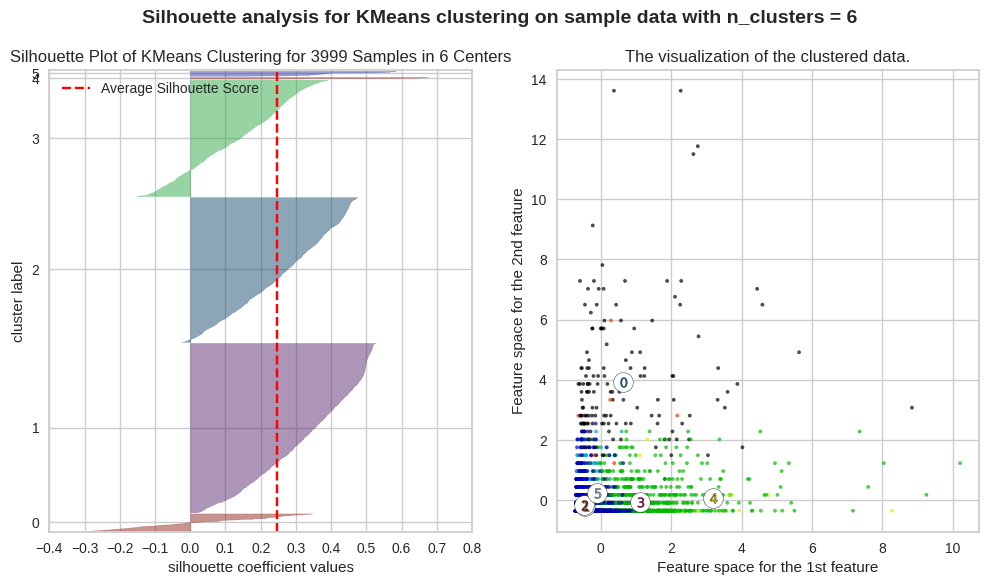

In [34]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(std_airline)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(std_airline[:, 6], std_airline[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()


# Plotting barplot using groupby method to get visualize how many row no. in each cluster

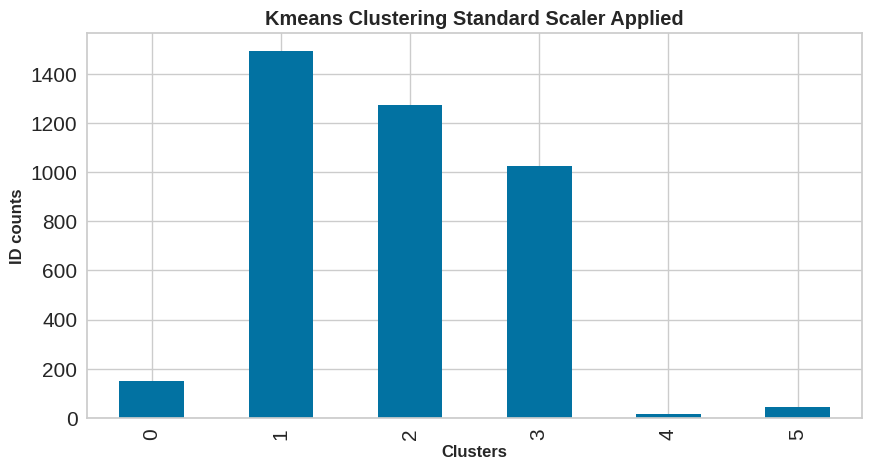

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
airline_df.groupby(['Kmeans_Label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='medium', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='medium', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

6.4 Elbow Method and Silhouette Score on MinMaxScaler Applied Data

In [36]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(norm_airline)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"Num_Clusters":cluster_range,"Cluster_Errors":cluster_errors})
clusters_df

,Num_Clusters,Cluster_Errors
0,1,2164.126598
1,2,1146.459517
2,3,865.262828
3,4,673.473453
4,5,536.203479
5,6,452.228431
6,7,397.944589
7,8,346.226852
8,9,308.516958
9,10,289.476932


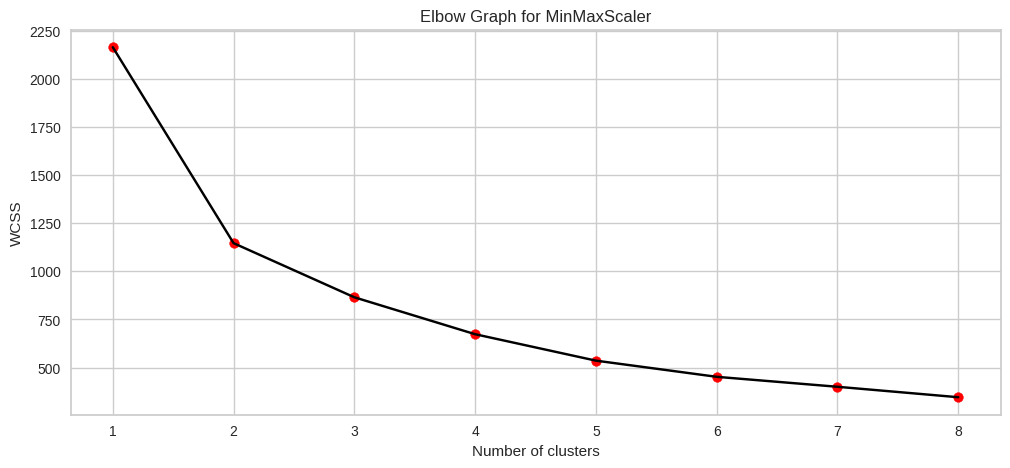

In [37]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(norm_airline)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(range(1,9), wcss,color = 'black')
plt.scatter(range(1,9), wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

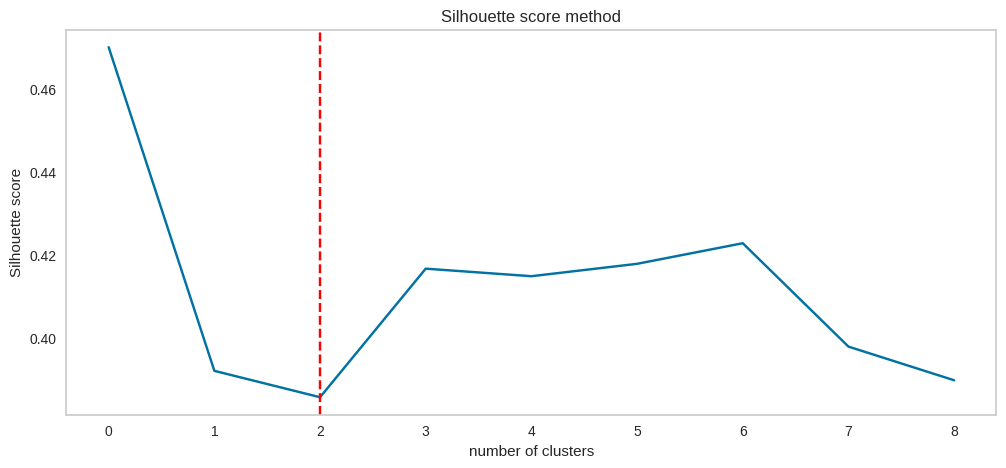

In [38]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(norm_airline)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(norm_airline, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot( s_scores, ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.

Elbow Plot for Normalization data


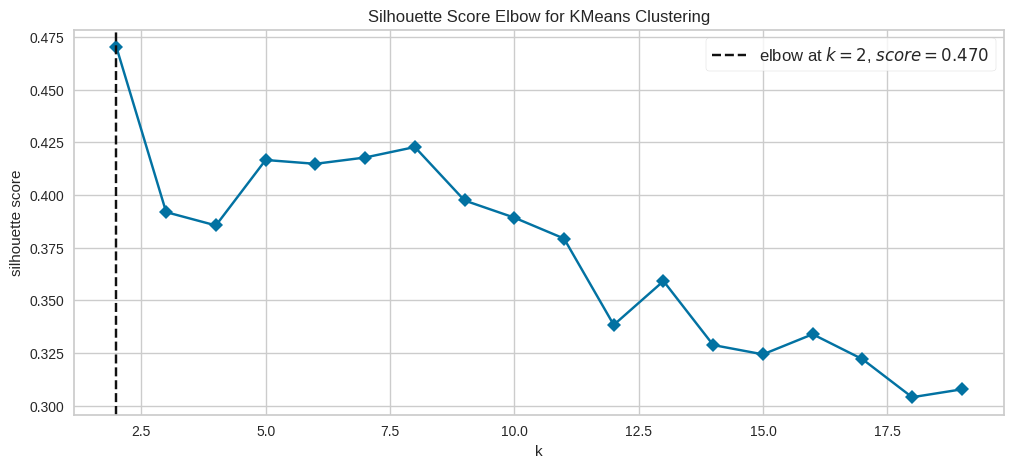

In [39]:
model = KMeans(random_state=10, max_iter=500, init='k-means++')
plt.subplots(figsize=(12,5))
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Normalization data')
visualizer.fit(norm_airline)
visualizer.poof()
plt.show()

With the elbow method, the ideal number of clusters to use was 6.

We will also use the Silhouette score to determine an optimal number.

In [40]:
clust_list = [2,3,4,5,6,7,8,9]

# Silhouette score for MinMaxScaler Applied on data .
for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(norm_airline)
    sil_score1= silhouette_score(norm_airline, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4701970394742716
For n_clusters = 3 The average silhouette_score is : 0.39192300832091903
For n_clusters = 4 The average silhouette_score is : 0.3855615917300375
For n_clusters = 5 The average silhouette_score is : 0.4166386993706997
For n_clusters = 6 The average silhouette_score is : 0.4148137981162694
For n_clusters = 7 The average silhouette_score is : 0.4178110309614972
For n_clusters = 8 The average silhouette_score is : 0.42277649570296266
For n_clusters = 9 The average silhouette_score is : 0.3977858631622425


Conclusion:
According the the silhouette score of:

The MinMax Scaler Applied data, the ideal number of clusters is 2, with a score higher than other options, of 0.53, but if you notice the number of cluster 5 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no mismatch in cluster segregation than the consecutive rest

If we check silhouette score with Normalize data kmeans model 0.53>0.32. Best score always close to +1.

6.5 Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset
We have found good number of cluster = 2
Model building using cluster numbers = 2

In [41]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(norm_airline)
y_predict_kmeans.shape

(3999,)

In [42]:
y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [43]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [44]:
model_kmeans.cluster_centers_

array([[ 4.33978319e-01,  5.69280197e-02,  2.15461508e-02,
         4.15428764e-01,  7.76502363e-03,  4.55773126e-03,
         1.09621005e-01,  1.83518364e-01,  2.78255837e-02,
         4.90489598e-02,  5.57398375e-01,  1.00000000e+00],
       [ 5.40340593e-01,  3.50812450e-02,  7.85813260e-03,
         1.76330421e-01,  6.94996029e-03,  2.18427323e-03,
         3.87875269e-02,  1.06313612e-01,  7.34309944e-03,
         1.23113582e-02,  4.60411394e-01, -3.05311332e-15]])

Within-cluster sum of squared

* The lower values of inertia are better and zero is optimal.
* Inertia is the sum of squared error for each cluster.
* Therefore the smaller the inertia the denser the cluster (closer together all the points are)

In [45]:
model_kmeans.inertia_

1146.4595170935333

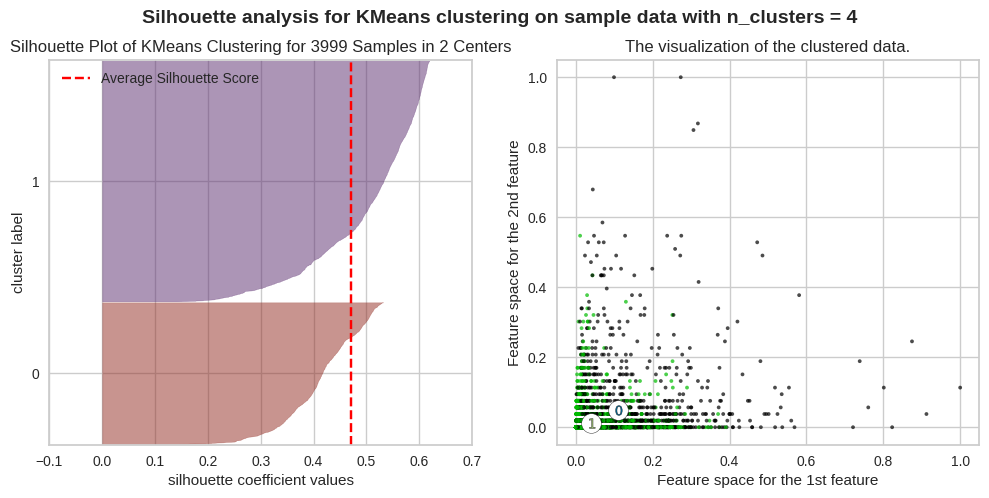

In [46]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,5)
sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(norm_airline)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
ax2.scatter(norm_airline[:, 6], norm_airline[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()


Plotting barplot using groupby method to get visualize how many row no. in each cluster

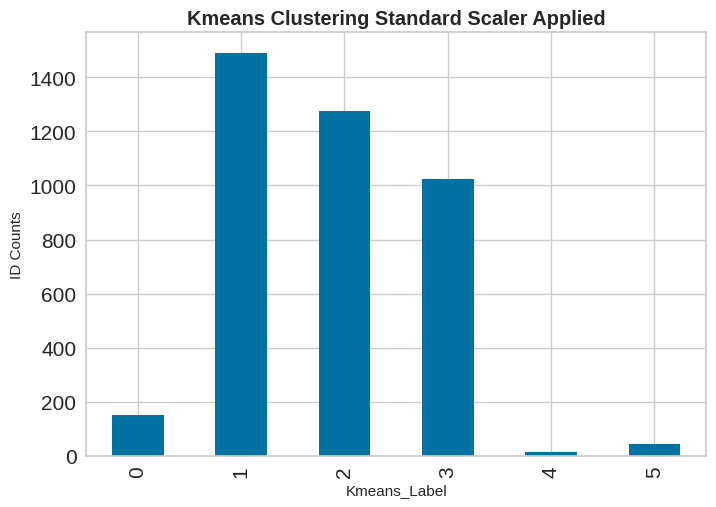

In [47]:
airline_df.groupby(['Kmeans_Label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [48]:
# Group data by Clusters (K=2)
airline_df.groupby('Kmeans_Label').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_Label,,,,,,,,,,,,
0,1737.980263,192951.493421,825.144737,2.217105,1.000000,1.000000,32546.440789,27.486842,5556.789474,16.243421,4687.375000,0.815789
1,3138.336016,39504.102616,97.894702,1.369551,1.000000,1.000000,6000.300469,7.591549,196.568075,0.586184,2137.751844,0.197854
2,1095.359498,57165.977237,105.302198,1.357928,1.000000,1.000785,5744.326531,7.839874,228.259027,0.706436,5710.485086,0.248823
3,1558.385742,125234.761719,164.642578,3.931641,1.000000,1.001953,44247.929688,19.273438,369.719727,1.104492,4936.738281,0.703125
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


We can now clearly see the 2 number of clusters formed, which can be described as under
* Cluster1, Tier 1 = "1" = Defines the group of fliers that earn the most out of the card and are frequent fliers
* Cluster0, Tier 2 = "0" = Defines the group of fliers that earn the least and are the least frequent fliers

7 Hierarchical Clustering Algorithm
7.1 Dendogram on MinMaxScaler Applied on Dataset
* Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
* Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding.
* Ward method is commanly used since it is simpler to visualize understanding.
Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

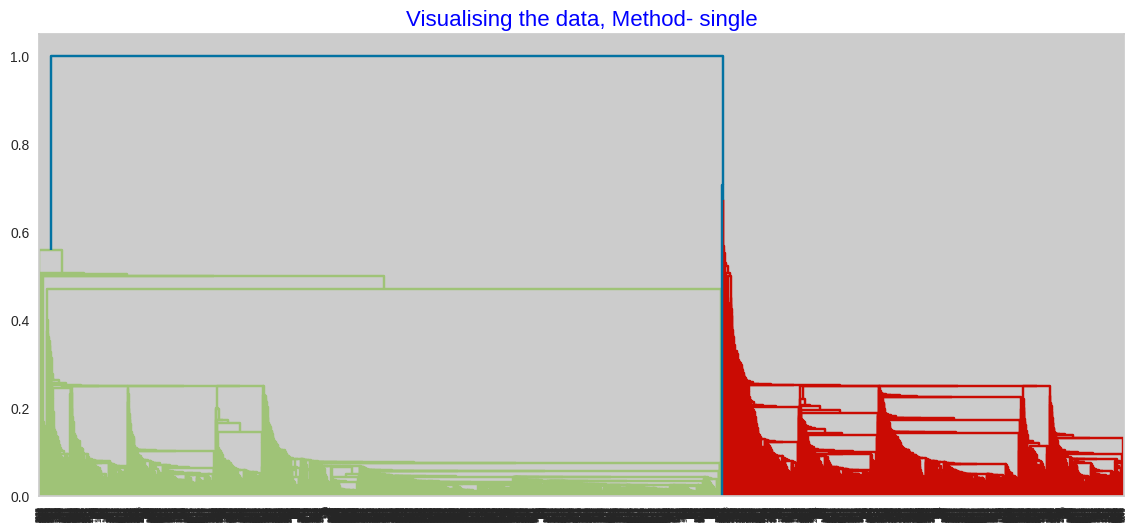

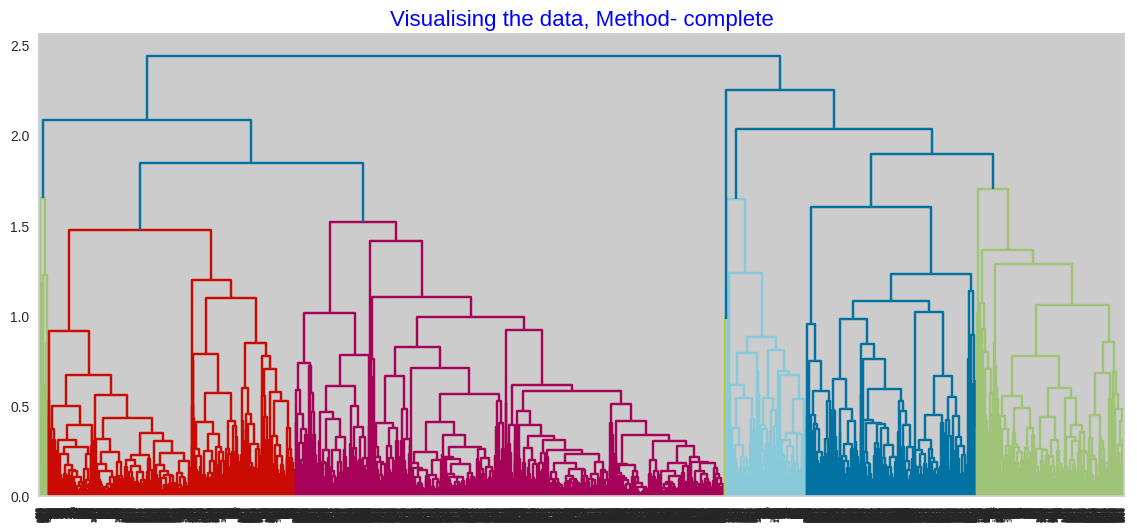

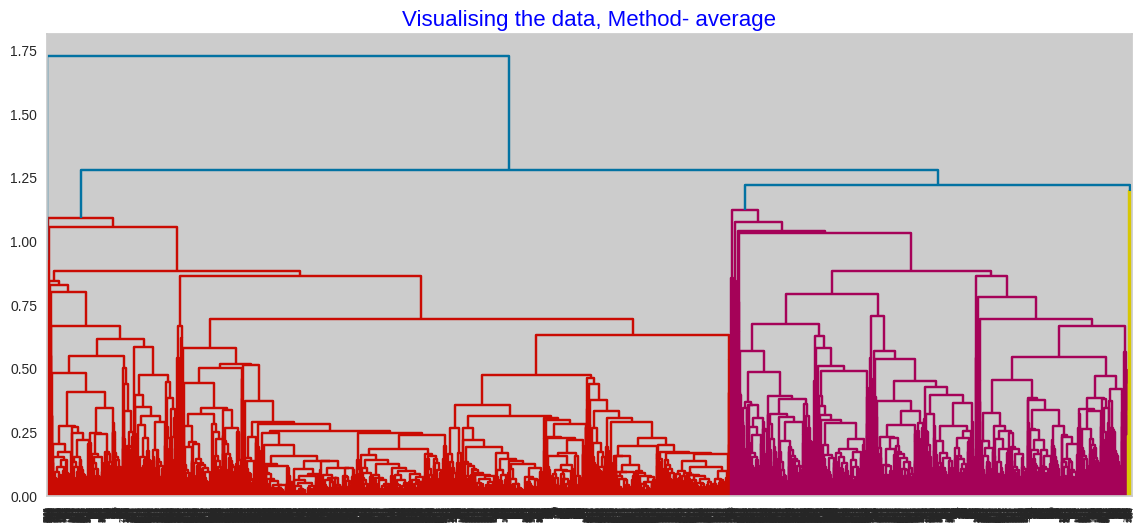

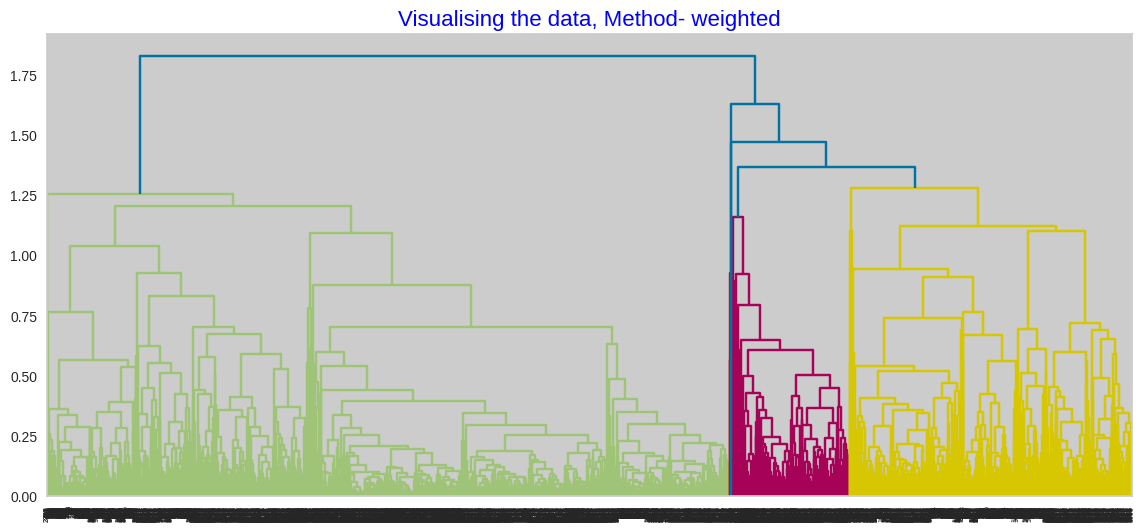

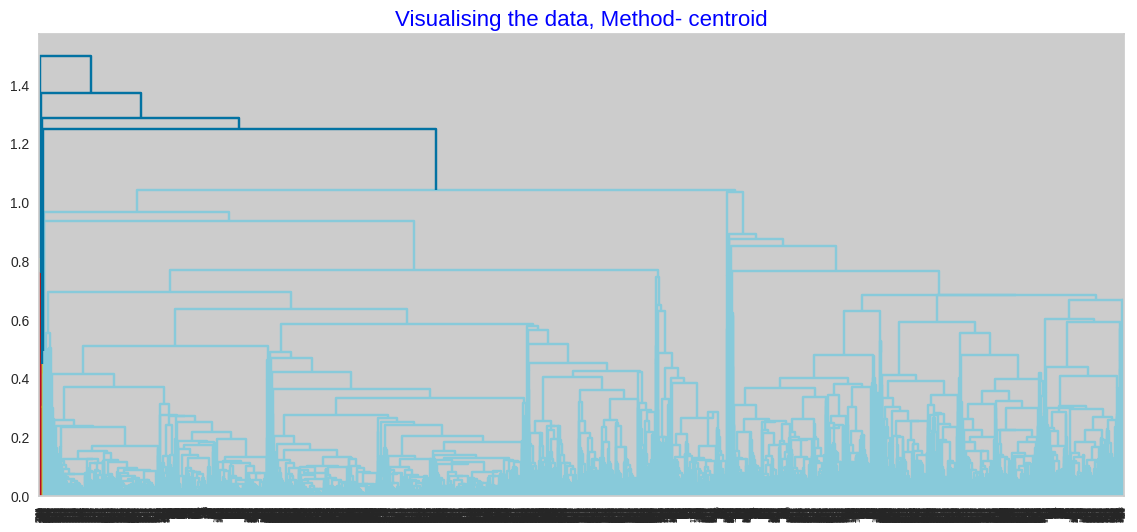

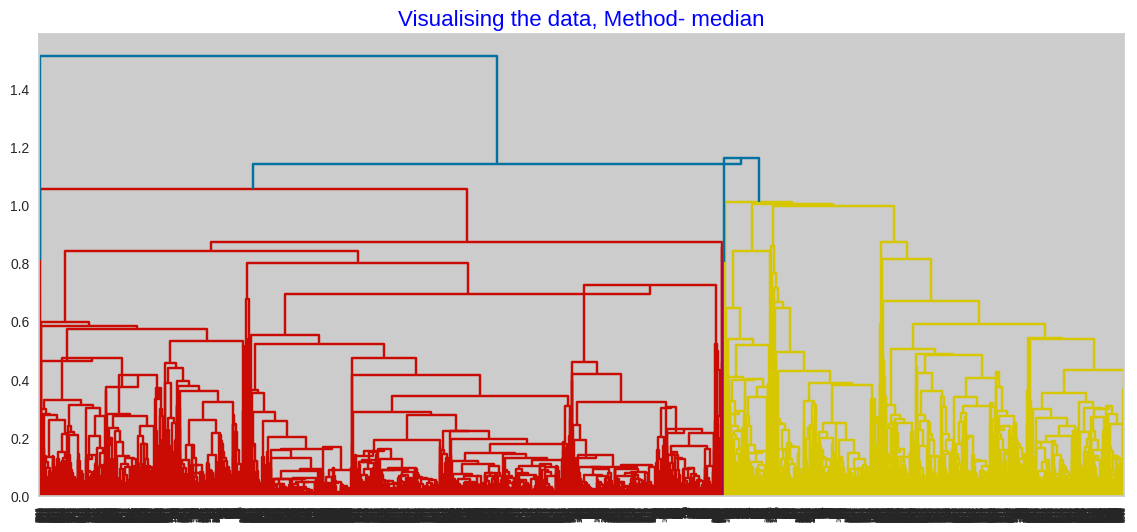

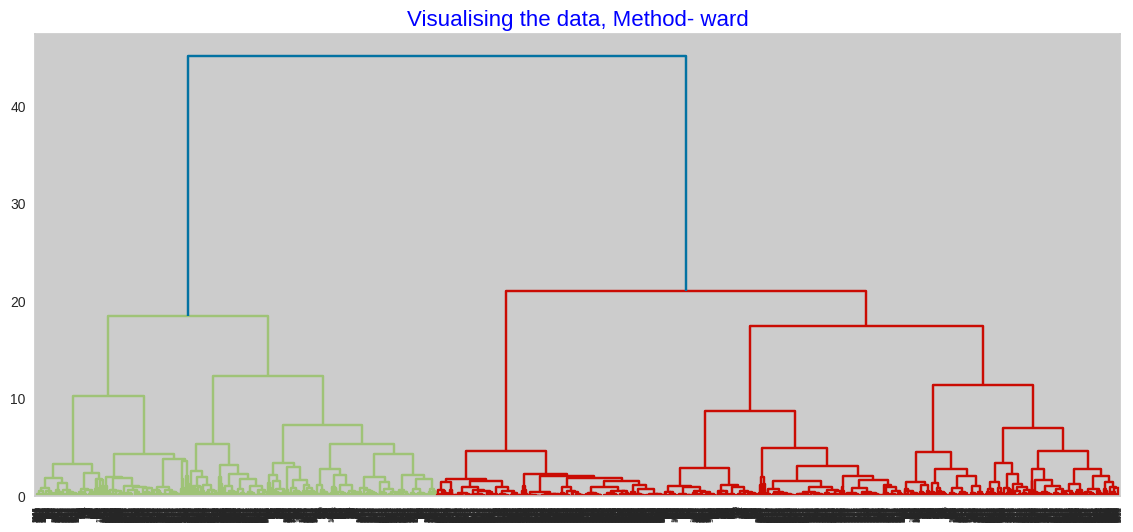

In [49]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(14,6))
    dict = {'fontsize':16,'fontweight' :14, 'color' : 'blue'}
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(norm_airline, method = methods,optimal_ordering=False))

In [50]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(norm_airline)
        silhouette_score1 = silhouette_score(norm_airline, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4701970394742716
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.46765873557390897
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4356499222984323
For n_clusters = 2 The average silhouette_score with linkage- single : 0.4701970394742716

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3434542103874939
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.4658447823503042
For n_clusters = 3 The average silhouette_score with linkage- average : 0.46834199629175055
For n_clusters = 3 The average silhouette_score with linkage- single : 0.46943588858264473

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.32621110074848614
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4121977176126768
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4383910691189487
F

The seperation in Ward Method indicate that 2 is the optimal number for clusters.

7.2 Dendrogram on Standard Scaler Applied on Data

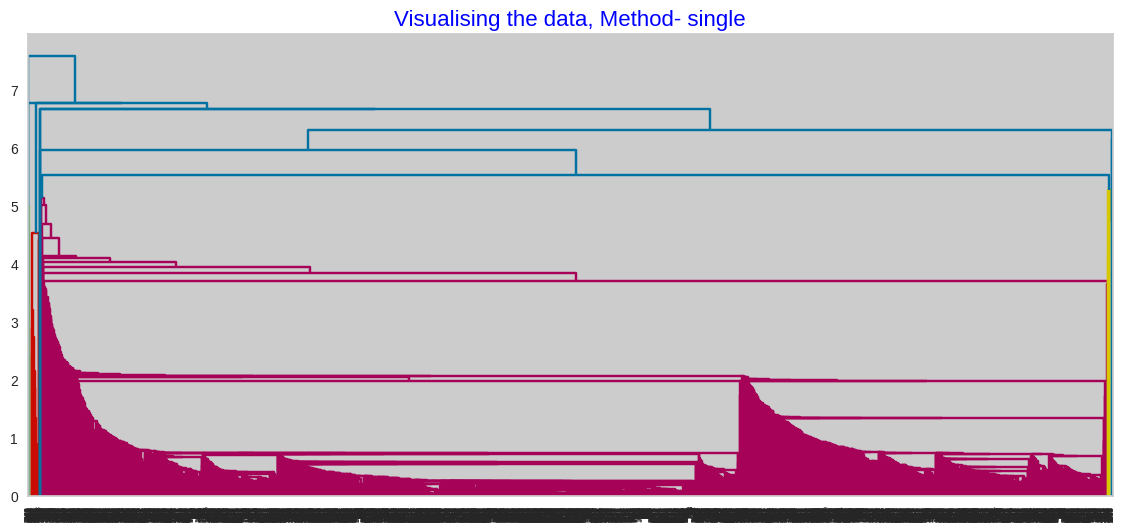

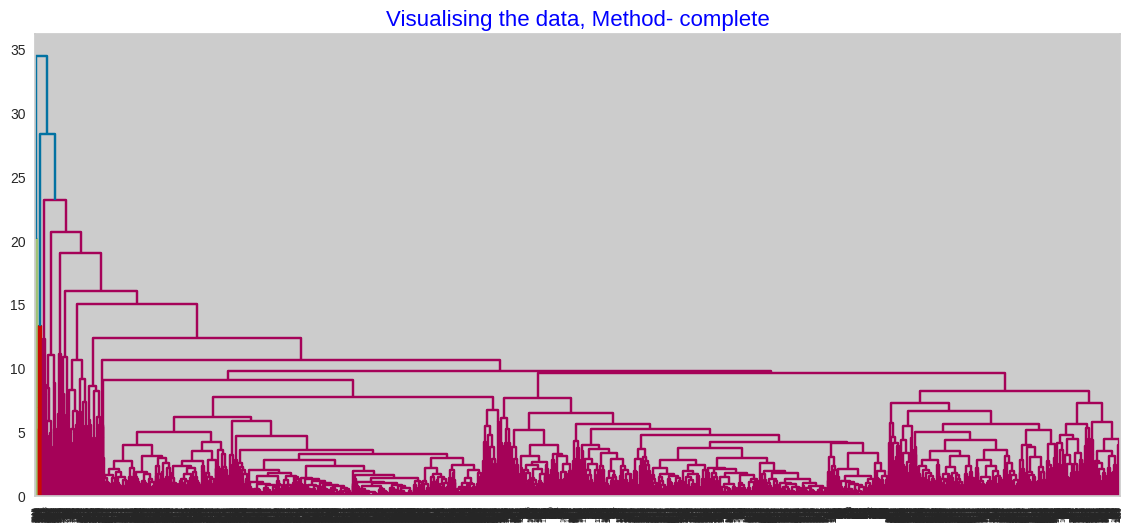

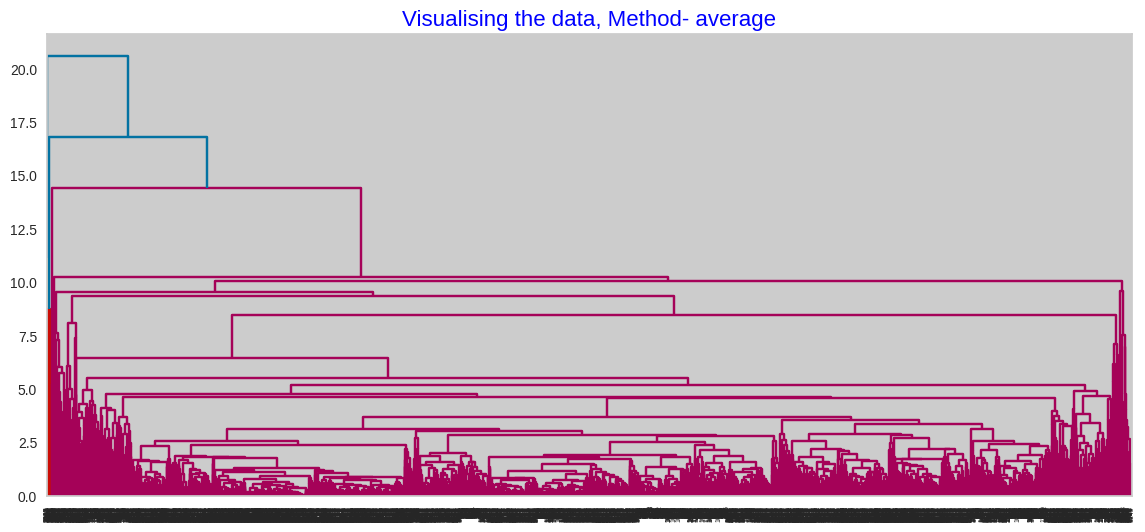

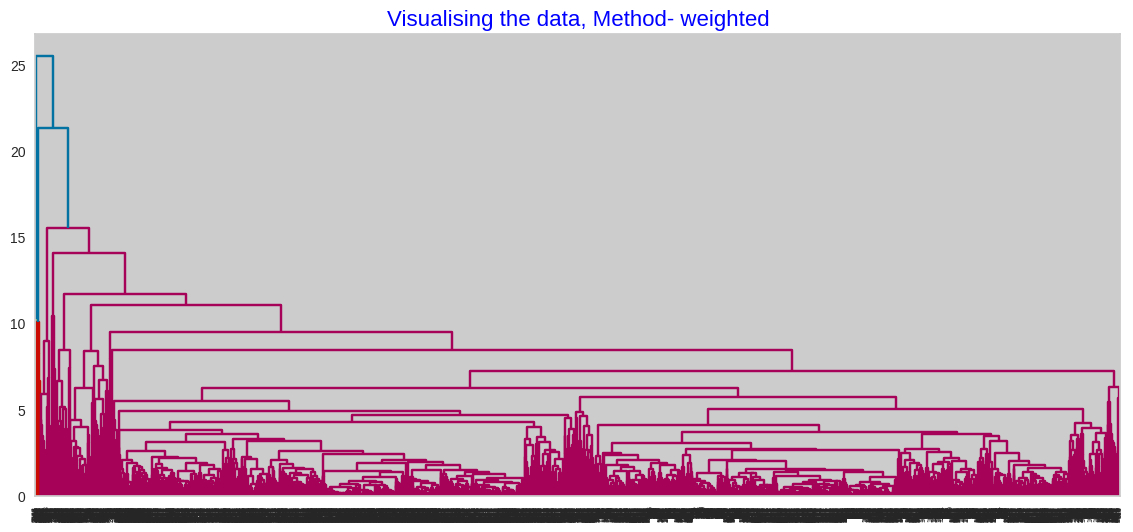

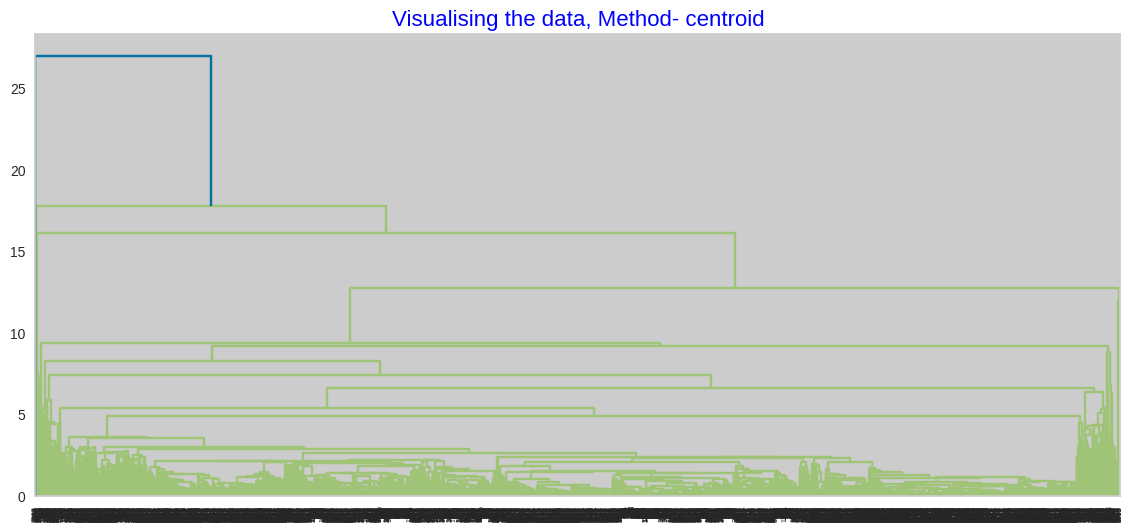

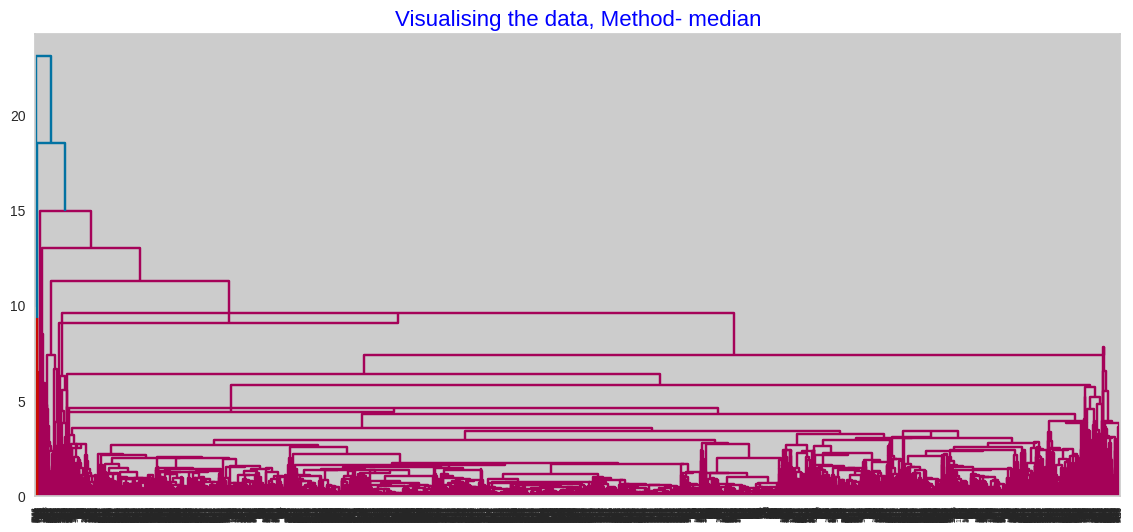

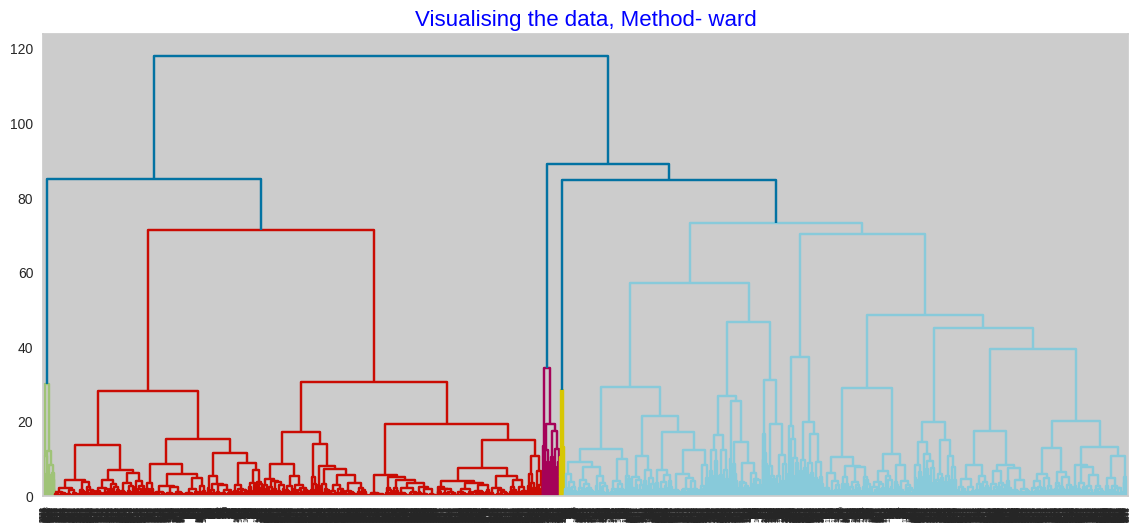

In [51]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(14,6))
    dict = {'fontsize':16,'fontweight' :14, 'color' : 'blue'}
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram2 = sch.dendrogram(sch.linkage(std_airline, method = methods,optimal_ordering=False))

In [54]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(std_airline)
        silhouette_score2 = silhouette_score(std_airline, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.1952883252471116
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.7147570737481664
For n_clusters = 2 The average silhouette_score with linkage- average : 0.7986913036411657
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8467289842517026

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.20526614352218822
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7192161842959359
For n_clusters = 3 The average silhouette_score with linkage- average : 0.760749640995539
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7172162983311359

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.21135914614865942
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6276977845234434
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7192609312303987
For 

Conclusion: Max score is with cluster numbers 2 in standard scaler transformation and in Min Max scaler transformation.
 * Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

7.3 Run Hierarchical Clustering (Agglomerative Clustering)

In [56]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(norm_airline)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 1, 0, 0])

In [60]:
agg_clustering.n_clusters_

2

In [62]:
(silhouette_score(norm_airline, agg_clustering.labels_)*100).round(3)

47.02

Putting Cluster lables into original dataset And analysis of the same

In [64]:
airline_df['Hierarchical_Labels'] = agg_clustering.labels_

In [65]:
airline_df.groupby('Hierarchical_Labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_Labels,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.660048
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,2.164754


8. DBSCAN - (Density Based Spatial Clustering of Applications with Noise)
  * 8.1 DBSCAN of Standard Scaled Data
* To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [67]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [68]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_airline)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_airline, DBS_clustering.labels_))

A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.


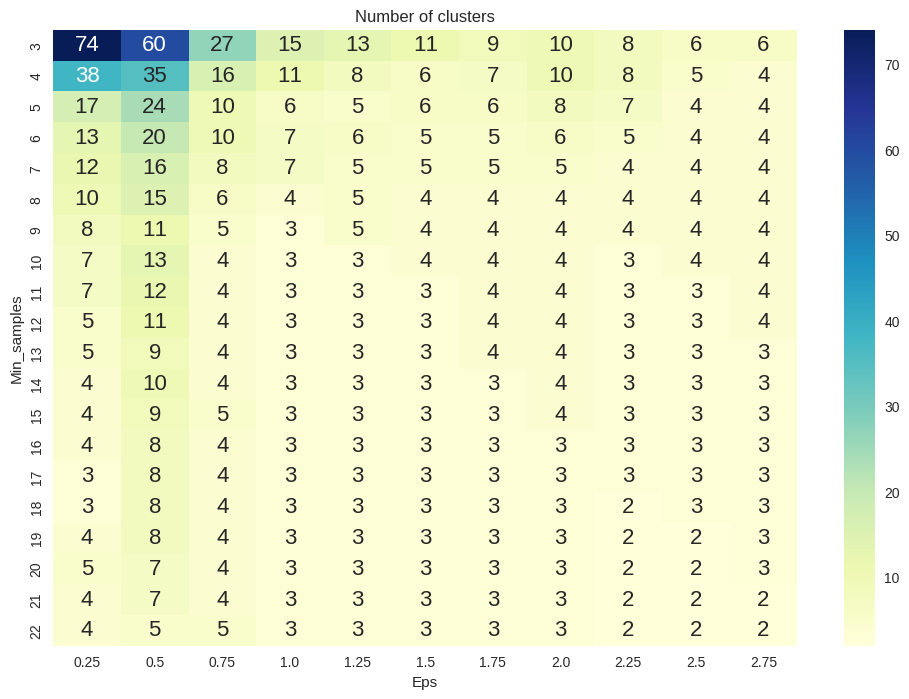

In [69]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

As the heatplot above shows, the number of clusters vary from 18 to 2.

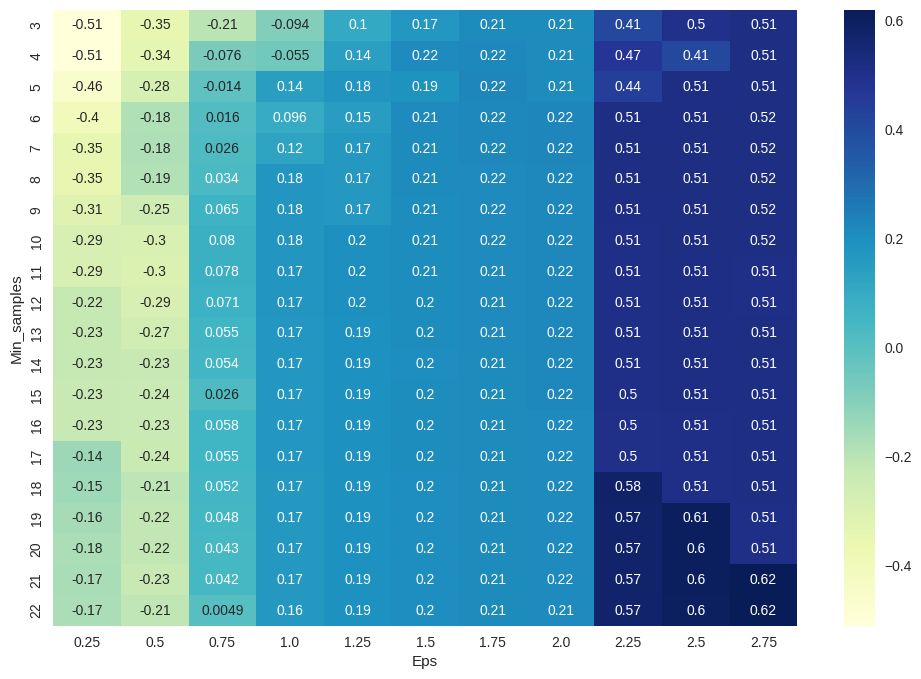

In [70]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.54 for eps=1.0 and min_samples=from 22 to 3

In [72]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_airline)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.4702


In [73]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(norm_airline)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        silhouette_avg = silhouette_score(norm_airline, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.4702


Run DBSCAN on MinMax Scaled data with optimal min_sample and epsilon values

In [74]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(norm_airline)

DBSCAN(eps=1, min_samples=22)

In [76]:
airline_df['DBSCAN_Labels'] = dbscan.labels_
airline_df.head()


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels,DBSCAN_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,1


In [77]:
airline_df.groupby('DBSCAN_Labels').agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_Label,Hierarchical_Labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Labels,,,,,,,,,,,,,,
0,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.660048,0.0
1,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,2.164754,1.0


Plotting barplot using groupby method to get visualize how many row no. in each cluster

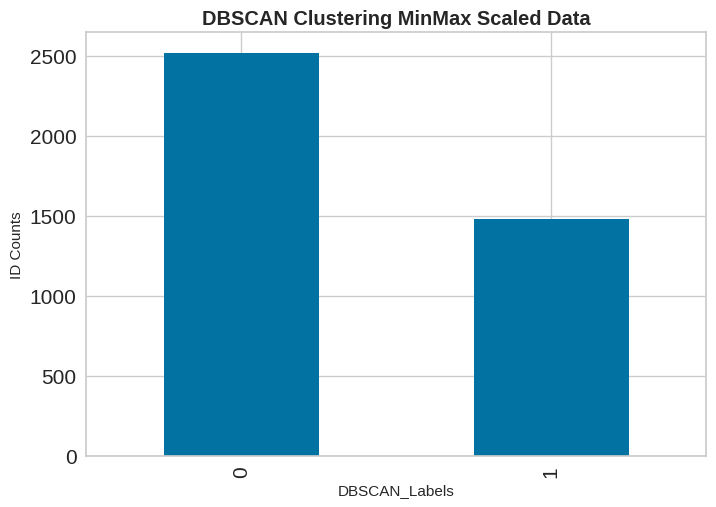

In [78]:
airline_df.groupby(['DBSCAN_Labels']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

Conclusion:
In cluster number 0 & 1 there are more customers. Need to focus on cluster 0 & 1.

Sorting elements based on cluster label assigned and taking average for insights.

In [79]:
cluster1 = pd.DataFrame(airline_df.loc[airline_df.DBSCAN_Labels==0].mean(),columns= ['Cluster1_Avg'])
cluster2 = pd.DataFrame(airline_df.loc[airline_df.DBSCAN_Labels==1].mean(),columns= ['Cluster2_Avg'])
avg_airline = pd.concat([cluster1,cluster2],axis=1)
avg_airline

,Cluster1_Avg,Cluster2_Avg
ID,2173.169182,1745.592843
Balance,59807.839555,97053.051317
Qual_miles,87.602462,240.196489
cc1_miles,1.705322,2.661715
cc2_miles,1.013900,1.015530
cc3_miles,1.008737,1.018231
Bonus_miles,10227.689039,28905.414585
Bonus_trans,9.142971,15.782579
Flight_miles_12mo,226.292295,857.501013
Flight_trans_12,0.652502,2.599595


Conclusion :
 * As decided need to focous on first two clusters.. Considering past Award status(0 or 1) cluster number2 shows award avg as 1 that means people awarded with scheme. Similarly for cluster number 2 award avg. is 0. Since avg is low that means now maximim award given to cluster number1 in the past. Need to add future schemes for cluster number two members on different bonus points & different card transaction bonus

9. Conclusion:
* I have applied EDA to analyze dataset. Discovered correlation between diff variables and found colinearity.
* Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.
* I have used & analyzed Three clustering techniques here. i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.
* By applying clustering on different transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.
* KMeans clustering is sensitive to outliers.